# In this notebook I am going to do data exploration. 
### I first will start with some feature engineering or we can say some more data cleaning. The reason I did not do this in step 2 of data cleaning is because not all the time we get readymade data with everything perfect. We have to do some feature engineering to explore the dataset.

## Step 1. Feature Engineering

In [27]:
# important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
# loading my cleaned data from step 2.
df = pd.read_csv('cleaned_data.csv')
df.head()

<IPython.core.display.Javascript object>

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,Same_Location_as_HQ,age,python_jd,tensor_pytorch,R_jd,spark_jd,excel_jd,tableau_jd,aws_jd
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,47,1,0,0,0,1,1,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,36,1,0,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,10,1,0,0,1,1,0,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,55,1,0,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,22,1,0,0,0,1,0,0


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'Same_Location_as_HQ', 'age', 'python_jd',
       'tensor_pytorch', 'R_jd', 'spark_jd', 'excel_jd', 'tableau_jd',
       'aws_jd'],
      dtype='object')

In [4]:
## job title and senority
## picking up some important job titles related to data science from my data.

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    if 'data engineer' in title.lower():
        return 'data engineer'
    if 'analyst' in title.lower():
        return 'analyst'
    if 'machine learning' in title.lower():
        return 'mle'
    if 'manager' in title.lower():
        return 'manager'
    if 'director' in title.lower():
        return 'director'
    else:
        return 'na'

# Which jobs requires senior level exp.
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
    


In [6]:
## creating a new column in df.
df['job_simp'] = df['Job Title'].apply(title_simplifier)
df.sample(10)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Same_Location_as_HQ,age,python_jd,tensor_pytorch,R_jd,spark_jd,excel_jd,tableau_jd,aws_jd,job_simp
55,Data Scientist,$56K-$95K (Glassdoor est.),"Sartorius Stedim Data Analytics, a market lead...",3.5,Sartorius\n3.5,"Albuquerque, NM","Gottingen, Germany",5001 to 10000 employees,1870,Company - Public,...,0,150,1,0,0,0,1,0,0,data scientist
393,Scientist Manufacturing Pharma - Kentucky BioP...,$68K-$139K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Owensboro, KY","Winston-Salem, NC",5001 to 10000 employees,1875,Company - Private,...,0,145,0,0,0,0,0,0,0,na
725,Senior Scientist - Regulatory Submissions,$80K-$155K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Winston-Salem, NC","Winston-Salem, NC",5001 to 10000 employees,1875,Company - Private,...,1,145,0,0,0,0,1,0,0,na
265,Data Scientist,$70K-$122K (Glassdoor est.),"Headquartered in Lynchburg, Va., BWX Technolog...",3.5,BWX Technologies\n3.5,"Oak Ridge, TN","Lynchburg, VA",5001 to 10000 employees,1850,Company - Public,...,0,170,1,1,0,0,0,0,0,data scientist
534,Scientist - Analytical Services,$65K-$134K (Glassdoor est.),British American Tobacco\nReynolds American In...,3.1,Reynolds American\n3.1,"Winston-Salem, NC","Winston-Salem, NC",5001 to 10000 employees,1875,Company - Private,...,1,145,0,0,0,0,1,0,0,na
97,Data Scientist,$74K-$124K (Glassdoor est.),Data Scientist\nUS Citizenship and a current T...,3.9,The Buffalo Group\n3.9,"Fort Belvoir, VA","Reston, VA",501 to 1000 employees,2010,Company - Private,...,0,10,1,0,0,0,1,1,0,data scientist
656,Data Scientist,$87K-$141K (Glassdoor est.),We’re looking for a data scientist to drive ou...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 to 5000 employees,1989,Company - Private,...,1,31,1,0,0,0,1,1,1,data scientist
671,Data Scientist - Systems Engineering,$50K-$89K (Glassdoor est.),MITRE is different from most technology compan...,3.2,MITRE\n3.2,"Bedford, MA","Bedford, MA",5001 to 10000 employees,1958,Nonprofit Organization,...,1,62,1,0,0,0,1,1,0,data scientist
270,"Sr. Scientist, Quantitative Translational Scie...",$117K-$206K (Glassdoor est.),Job Description\n\n\nMillennium Pharmaceutical...,3.7,Takeda Pharmaceuticals\n3.7,"Boston, MA","OSAKA, Japan",10000+ employees,1781,Company - Public,...,0,239,0,0,0,0,0,0,0,na
403,"Associate Director/Director, Safety Scientist",$102K-$178K (Glassdoor est.),Who are we?\n\nAcceleron is a biopharmaceutica...,4.4,Acceleron Pharma\n4.4,"Cambridge, MA","Cambridge, MA",201 to 500 employees,2003,Company - Public,...,1,17,0,0,0,0,1,0,0,director


In [7]:
# we can see that most jobs are for data scientist, followed by data engineer.
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [9]:
## remove Los angeles as its not a state

df['job_state'] = df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
UT     10
IN     10
WI     10
AZ      9
MO      9
AL      8
DE      6
KY      6
GA      6
MI      6
IA      5
CT      5
LA      4
OR      4
NE      4
KS      3
NM      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

In [10]:
## take out the job description length
## this might help in future as it will be interesting to see how the length of job desc affects the avg_salary.
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [12]:
## find the number of competitors for each company

df['num_comp'] = df.Competitors.apply(lambda x: len(x.split(',')) if x != '-1' else 0)
df.num_comp.value_counts()

0    460
3    228
2     41
1     12
4      1
Name: num_comp, dtype: int64

In [19]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,17,24
177,1,21,34
197,1,18,25
202,1,21,34
210,1,15,25
246,1,17,24
271,1,21,34
337,1,18,25
345,1,24,39
357,1,21,34


In [22]:
# hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary,axis=1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [23]:
df[df.hourly==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [24]:
#remove new line from job title

df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [25]:
df.company_txt.sample(5)

145                     AVANADE
399          Equity Residential
382                          QK
692                       MITRE
497    Liberty Mutual Insurance
Name: company_txt, dtype: object

## Step 2: Form here I will start my EDA

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B3240EDC50>,
      dtype=object)

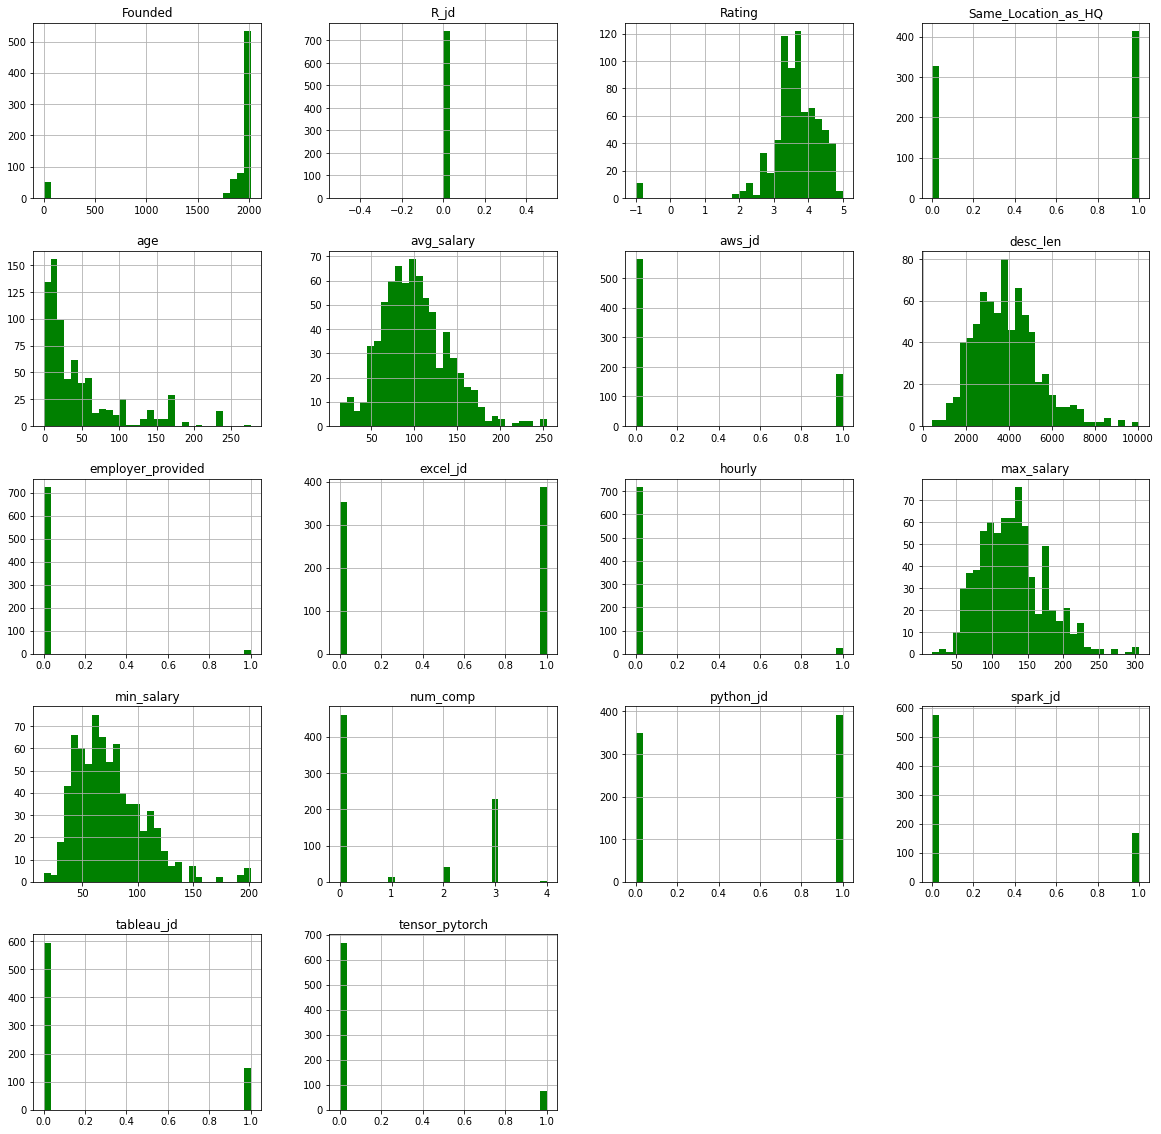

In [26]:
# ploting the histogram of each feature. This step gives a lot of information about the data features.
## one interesting fact I noted here is that many companies are asking for excel skill and its much more than requirements for tableau. Thats strange for me.
df.hist(bins=30, figsize=(20,20),color='g')

In [28]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,Same_Location_as_HQ,age,python_jd,tensor_pytorch,R_jd,spark_jd,excel_jd,tableau_jd,aws_jd,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.101078,0.0,0.225067,0.522911,0.199461,0.237197,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.301636,0.0,0.417908,0.499812,0.399865,0.425651,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [31]:
# oldest company
df[df['age']==276]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor_pytorch,R_jd,spark_jd,excel_jd,tableau_jd,aws_jd,job_simp,seniority,desc_len,num_comp
277,Data Scientist,$95K-$161K (Glassdoor est.),Overview\n\n\nAt Sotheby’s we use data science...,3.6,Sotheby's\n3.6,"New York, NY","New York, NY",1001 to 5000 employees,1744,Company - Public,...,0,0,0,0,0,0,data scientist,na,2041,0


In [37]:
## company proving lowest salary
df[df['min_salary']==15]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,tensor_pytorch,R_jd,spark_jd,excel_jd,tableau_jd,aws_jd,job_simp,seniority,desc_len,num_comp
240,Data Scientist,$15K-$16K(Employer est.),Learn and work on meaningful initiatives with ...,3.9,NPD\n3.9,"Port Washington, NY","Port Washington, NY",1001 to 5000 employees,1966,Company - Private,...,0,0,0,1,0,0,data scientist,na,5019,0


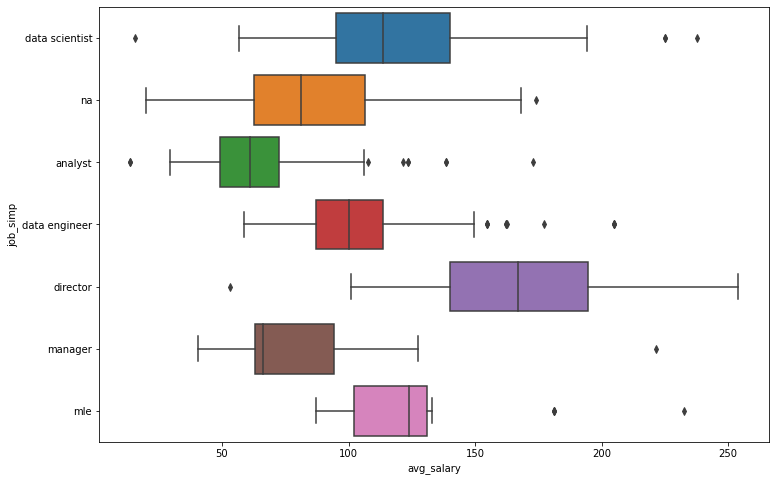

In [39]:
## This is the most important plot as it shows average salary for each data related fields. Clearly directors are paid most.
plt.figure(figsize=(12,8))
sns.boxplot(x='avg_salary',y='job_simp',data=df)

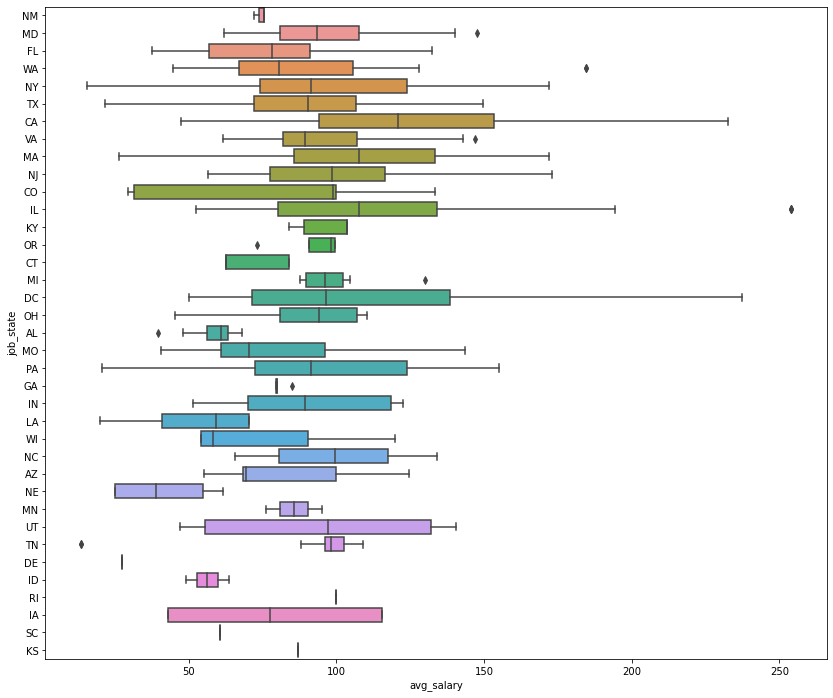

In [67]:
#Avg salary as per states. California state has the highest avg salary. 
plt.figure(figsize=(14,12))
sns.boxplot(x='avg_salary',y='job_state',data=df)

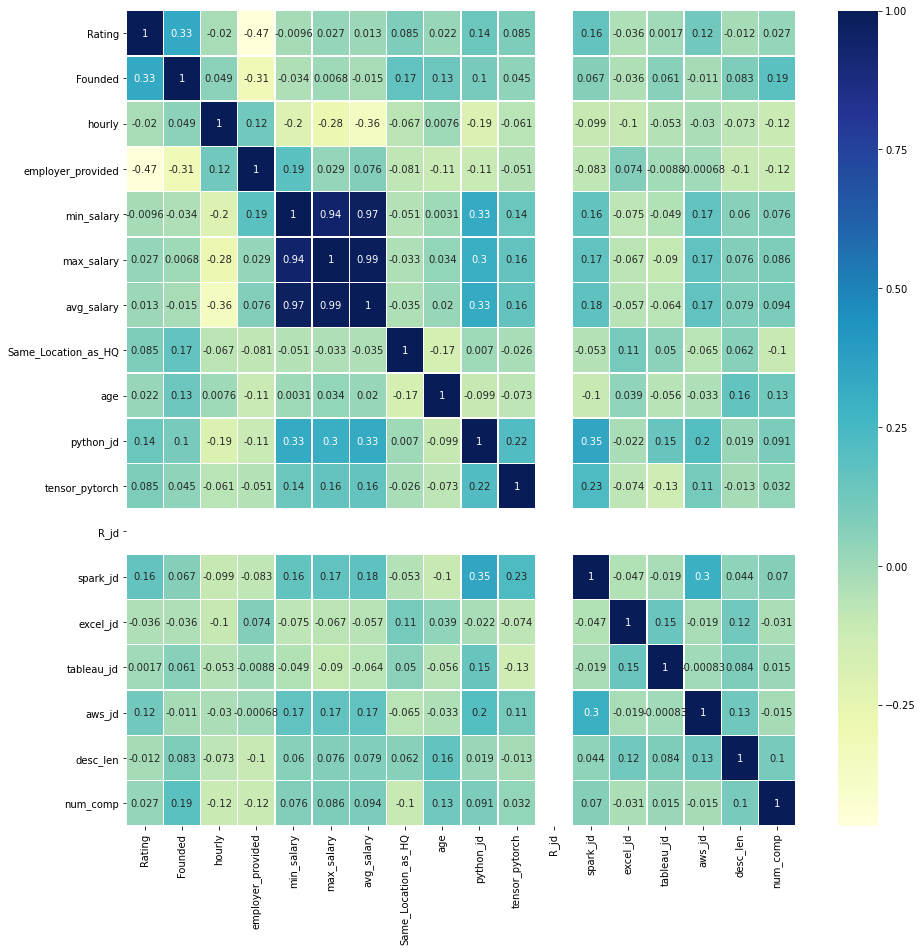

In [54]:
# correlation plot.
## There is a very good corelation between avg_salary and python jobs. So clearly python skills will help you a lot in Data science.
correlations = df.corr()
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, annot=True, cmap="YlGnBu", linewidths=.5)

In [59]:
cat_var = df.select_dtypes(exclude=['int', 'float']).columns #cat Variable

numeric_var = df.select_dtypes(include=['int', 'float']).columns # numeric Varible

In [60]:
numeric_var

Index(['Rating', 'avg_salary'], dtype='object')

In [61]:
cat_var

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Company Name',
       'Location', 'Headquarters', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'Competitors', 'hourly',
       'employer_provided', 'min_salary', 'max_salary', 'company_txt',
       'job_state', 'Same_Location_as_HQ', 'age', 'python_jd',
       'tensor_pytorch', 'R_jd', 'spark_jd', 'excel_jd', 'tableau_jd',
       'aws_jd', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

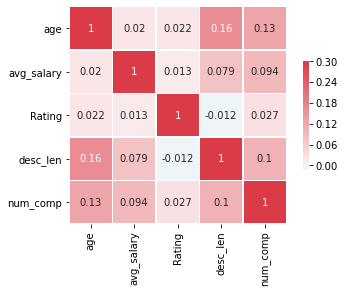

In [64]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [70]:
# picking up some important categorical features for analyses.
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','Same_Location_as_HQ', 'python_jd', 'R_jd',
       'spark_jd', 'aws_jd', 'excel_jd', 'job_simp', 'seniority']]

graph for Location: total = 200


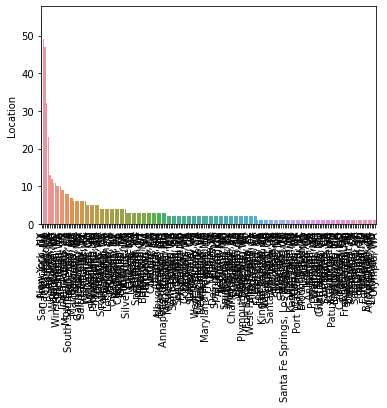

graph for Headquarters: total = 198


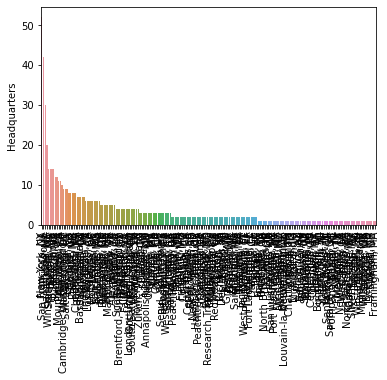

graph for Size: total = 9


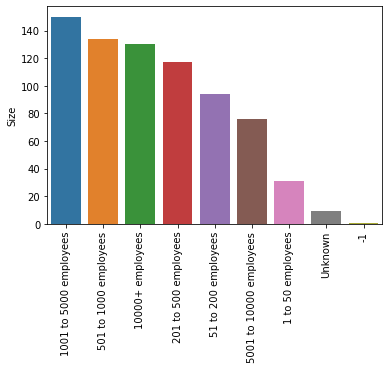

graph for Type of ownership: total = 11


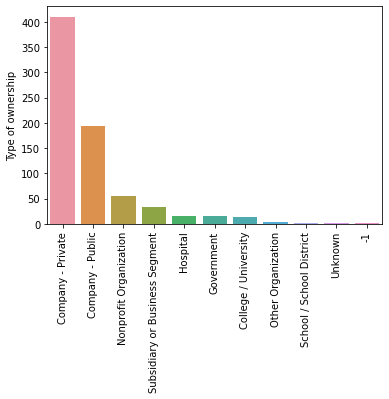

graph for Industry: total = 60


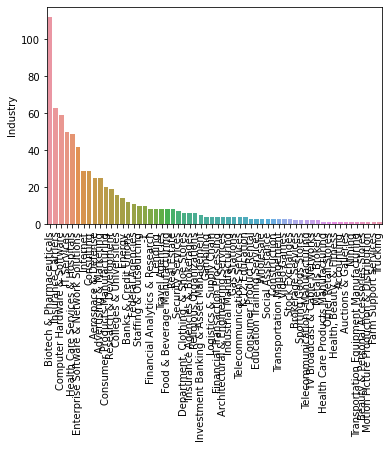

graph for Sector: total = 25


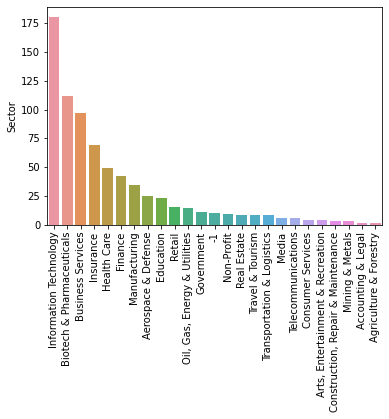

graph for Revenue: total = 14


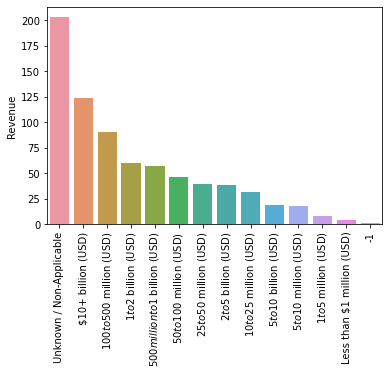

graph for company_txt: total = 343


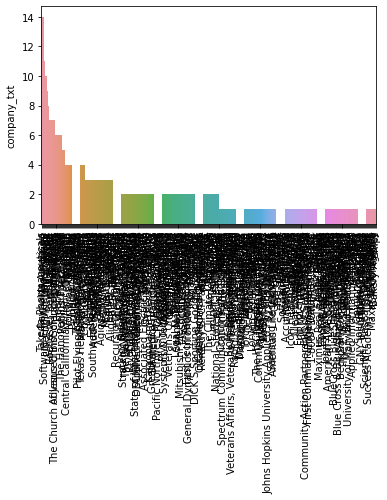

graph for job_state: total = 37


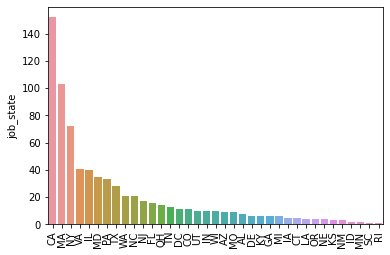

graph for Same_Location_as_HQ: total = 2


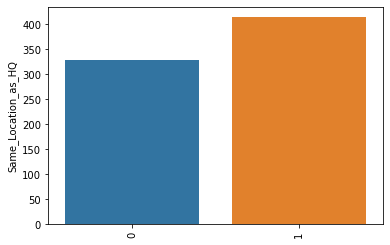

graph for python_jd: total = 2


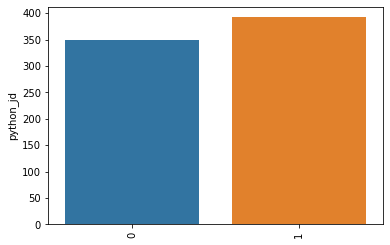

graph for R_jd: total = 1


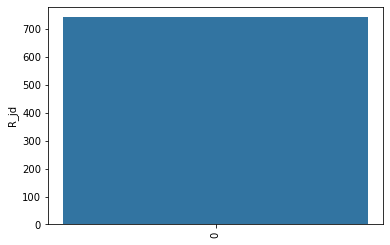

graph for spark_jd: total = 2


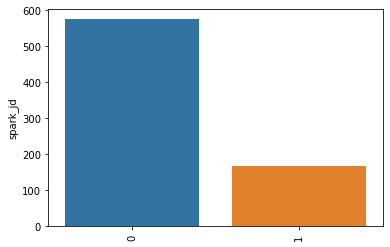

graph for aws_jd: total = 2


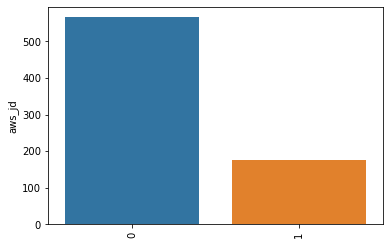

graph for excel_jd: total = 2


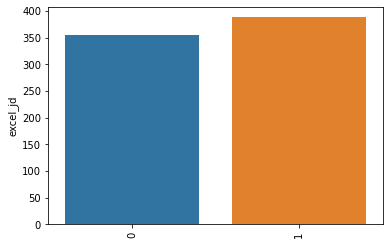

graph for job_simp: total = 7


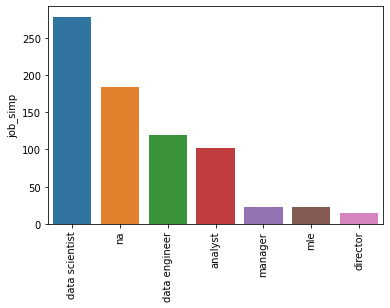

graph for seniority: total = 3


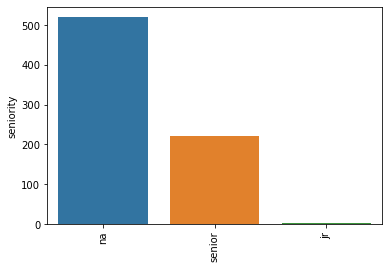

In [71]:
# ploting bar graphs for all the important features.
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


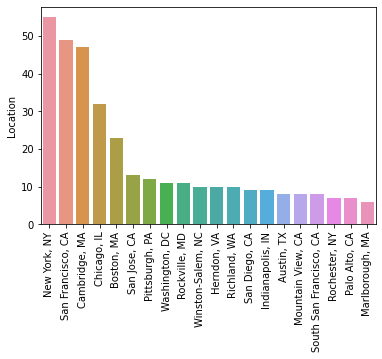

graph for Headquarters: total = 20


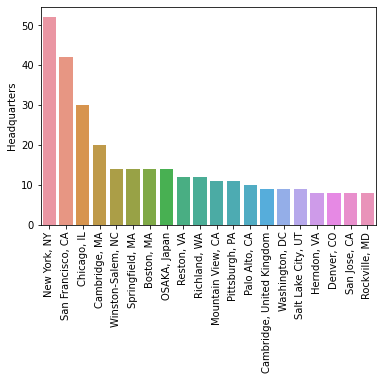

graph for company_txt: total = 20


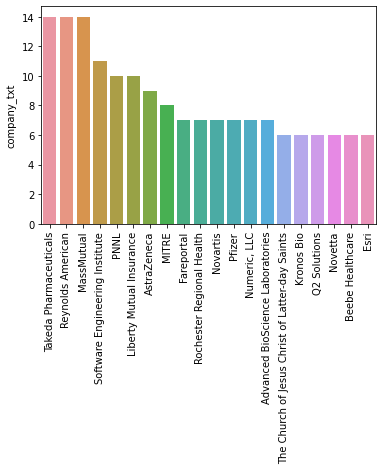

graph for Industry: total = 20


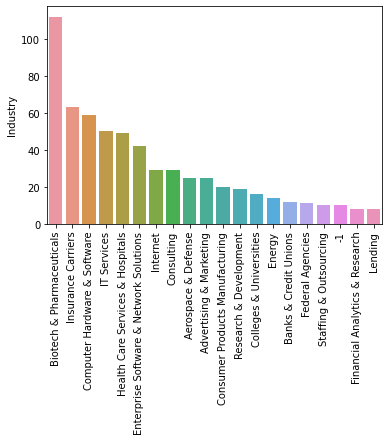

In [72]:
# some graphs above are not clear. Hence I pick up only the top 20 for such features.
for i in df_cat[['Location','Headquarters','company_txt','Industry']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

### Making some pivot tables always helps. 

In [78]:
# avg salary as per job positions. Directors are paid the highest followed by machine learning engineers. Interesting to see managers are aid less. But this is only analyses on some 800 job positions.
pd.pivot_table(df,index='job_simp', values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_simp,
director,168.607143
mle,126.431818
data scientist,117.564516
data engineer,105.403361
na,84.853261
manager,84.022727
analyst,65.857843


In [77]:
# avg salary in each state.
pd.pivot_table(df,index='job_state',values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [80]:
# avg salary as per different sectors.
pd.pivot_table(df,index='Sector',values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Sector,
Media,116.666667
-1,114.650000
Accounting & Legal,113.500000
Information Technology,113.191667
Biotech & Pharmaceuticals,111.767857
Insurance,105.942029
Real Estate,104.750000
Mining & Metals,104.000000
Telecommunications,102.333333


In [84]:
#avg salary as per company renevue
pd.pivot_table(df,index='Revenue',values='avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Revenue,
$5 to $10 million (USD),126.111111
$1 to $5 million (USD),119.312500
-1,117.500000
$10+ billion (USD),115.165323
Less than $1 million (USD),108.625000
$1 to $2 billion (USD),104.533333
Unknown / Non-Applicable,104.310345
$50 to $100 million (USD),100.565217
$10 to $25 million (USD),100.359375


In [86]:
# avg salary for a data scientist as per states.
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [88]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_jd', 'R_jd', 'spark_jd', 'aws_jd', 'excel_jd', 'Type of ownership','avg_salary']]

In [93]:
# pivot tables for some important features with respect to avg_salary.
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index = i, values= 'avg_salary').sort_values('avg_salary',ascending= False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

### Generating wordcloud of most frequent words in job description.

In [95]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

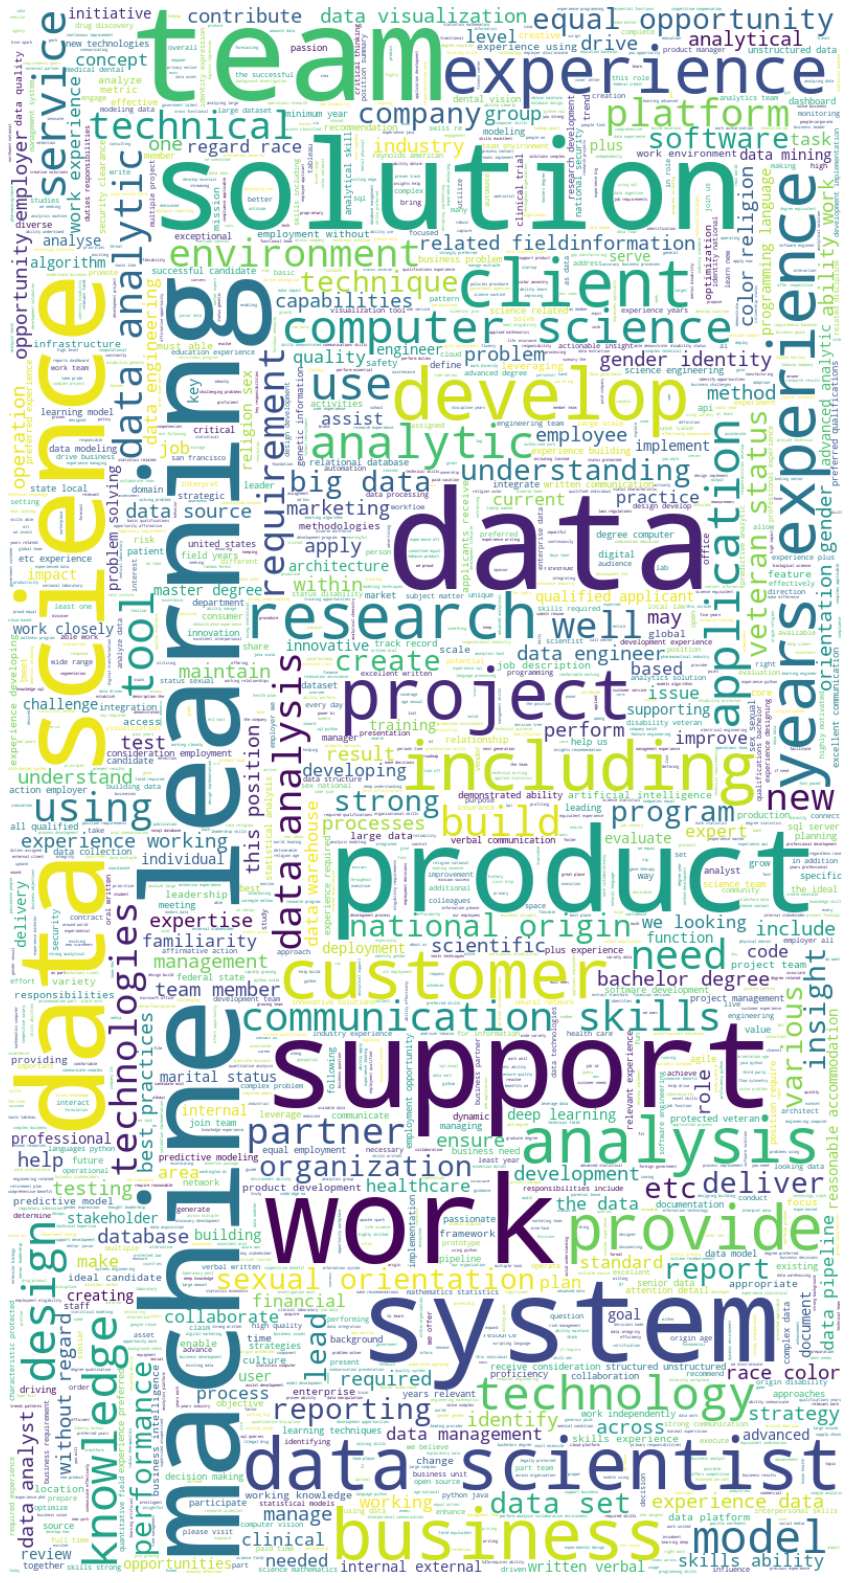

In [98]:

words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[15,30])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()